### 2Face Idibia: A Lyrical analysis
This exercise will pull all the songs by 2Face Idibia on Genius.com and run sentiment analysis on the lyrics to determine the sentiment polatiry for all songs and albums. <br> The score will be on pisitivity of the lyrics.<br> We can also look at the difference in lyrics betwen 2Face Idibia and 2Baba

First we save our genius identification

In [ ]:
genius_client_id = 'mM_UqRz1pNsawnzq1KJ9aSrvsz3P6wTLARQNongLrcXZpTiRA25ul_xD5gqQTSDo'
genius_secret = 'KyNJWaxnx3TSySHdnnA07E5Abw1G5X--SPz33sBJ65XdQni-UKVOYW8owdH9o2lRH7u9ykvml9_4jEghf7qnZw'
genius_token = 'W7RIDSht2rGxPSp4c6R2xwXMeEu6nWJvgedjI_a9ANczFGlkDz6JkHSfkXtsehnH'

Then we import the required libraries.

In [2]:
import lyricsgenius
import pandas as pd
import json
import nltk
import re

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import pillow

We then save the genius request "genius"

In [ ]:
genius = lyricsgenius.Genius(genius_token)

Then we search the api for all songs by "2face Idibia".<br> What we found out was that the same artist is saved under different names, probably cuz the artist has released songs under different names, or iterations of the same name. <br> @face has "2Face Idibia" and "2Baba". 

In [ ]:
_2Face_Idibia = genius.search_artist("2face Idibia", sort="title")

In [ ]:
len(_2Face_Idibia)

So 37 songs were found under "2Face Idibia". This should be enough for now.<br>We can also search for 2Baba to see what comes up.

In [ ]:
_2Baba = genius.search_artist("2baba",sort="title")

The next line saves the information we retrieved for 2Face Idibia as a json file in the current working directory.

In [ ]:
_2Face_Idibia.save_lyrics()

We will then import that json file and load into "Artist"

In [4]:
with open('Lyrics_2FaceIdibia.json') as json_file:
    Artist = json.load(json_file)
#Artist=pd.read_json("Lyrics_2FaceIdibia.json")

We will now look at the keys available in the json file. This will enable us understand the structure of the file a bit better.

In [5]:
Artist.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'description_annotation', 'user', 'songs'])

The first thing that stands out is the 'songs' key. After some trial and error we have figured out how to access the songs and their lyrics.<br>We now create a dictionary that holds each song as key and the lyrics as values.

In [6]:
lyrics = {}
for x in range(len(Artist["songs"])):
    lyrics[Artist["songs"][x]["title"]] = Artist["songs"][x]["lyrics"]

In [8]:
lyrics.keys()

dict_keys(['4 Instance', 'African Queen', 'African queen (mkd remix)', 'Be There', 'Dance Floor', 'Dance In The Rain', 'Dancing in The Rain', 'E Be Like Say', 'Fly', 'Gaga Shuffle', 'Hate What You Do To Me', 'Higher Healing', 'Higher (Spiritual Healing)', 'If Love Is A Crime', 'Implication', 'Implications', 'I sing', 'My Love', 'Nfana Ibaga', 'Nfana Ibaga (No Problem) (Remix)', 'No shakin', 'Ocho', 'Ole', 'Olè ft Freestyle', 'Ole (Thief)', 'Omo tosan', 'One Love', 'Only Me', 'Outside', 'Oya come make we go', 'Rainbow', 'Raindrops', 'Right Here', 'See Me So', 'Thank U Lord', 'True Love', 'U No Holy Pass'])

The dictionary 'lyrics' holds each song as jey and the lyrics as values.

In [9]:
splits = {}
for song in lyrics:
    splits[song] = lyrics[song].lower().split()

In [10]:
splits.keys()

dict_keys(['4 Instance', 'African Queen', 'African queen (mkd remix)', 'Be There', 'Dance Floor', 'Dance In The Rain', 'Dancing in The Rain', 'E Be Like Say', 'Fly', 'Gaga Shuffle', 'Hate What You Do To Me', 'Higher Healing', 'Higher (Spiritual Healing)', 'If Love Is A Crime', 'Implication', 'Implications', 'I sing', 'My Love', 'Nfana Ibaga', 'Nfana Ibaga (No Problem) (Remix)', 'No shakin', 'Ocho', 'Ole', 'Olè ft Freestyle', 'Ole (Thief)', 'Omo tosan', 'One Love', 'Only Me', 'Outside', 'Oya come make we go', 'Rainbow', 'Raindrops', 'Right Here', 'See Me So', 'Thank U Lord', 'True Love', 'U No Holy Pass'])

So this will be the first insight we will get from this data.<br>Taking one of the songs (African Queen), we look at the frequent words distribution and the word cloud.

In [11]:
 nltk.FreqDist(splits['Hate What You Do To Me']).most_common(30)

[('na', 49),
 ('you', 37),
 ('to', 33),
 ('i', 23),
 ('tell', 20),
 ('cannot', 18),
 ('oh', 17),
 ('hate', 12),
 ('what', 12),
 ('do', 11),
 ('me,', 10),
 ('go,', 9),
 ('stay', 9),
 ('ah,', 9),
 ('we', 7),
 ('ah', 7),
 ('and', 4),
 ('it', 4),
 ('is', 4),
 ('eh', 3),
 ("ma'ilo", 3),
 ('love', 3),
 ('the', 3),
 ('see', 3),
 ('every', 3),
 ('time', 3),
 ('you,', 3),
 ('me', 3),
 ('not', 3),
 ('here', 3)]

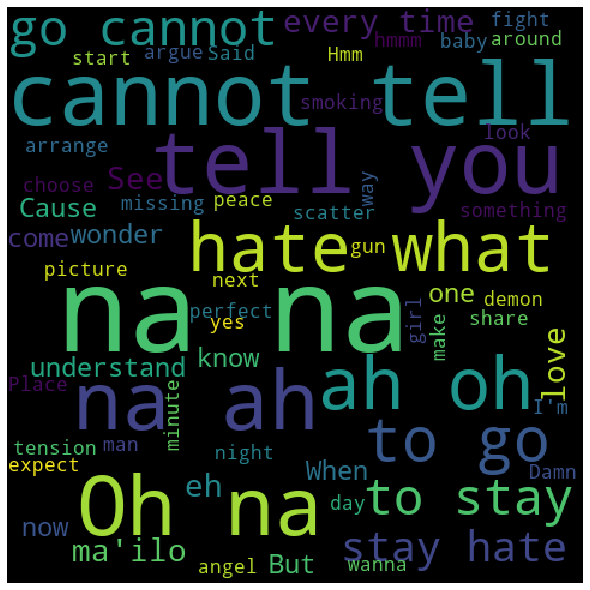

In [16]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(lyrics['Hate What You Do To Me'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Now we start playing around with monkeylearn.

In [17]:
from monkeylearn import MonkeyLearn
 
ml = MonkeyLearn('78dc19da9f812250a9dfe3c4a4af94a8f1f639db')
#data = ['The restaurant was great!', 'The curtains were disgusting']


In [ ]:
lyriclist = []
for x in lyrics:
    temp = [lyrics[x]]
    lyriclist.append(temp)
len(lyriclist)

In [29]:
data = ["""And If you Look Into My Eyes you See Desire In There(Desire), 
Gal If love Is Crime Den I Want 2 B Wanted, If love Is A Crime I'm Willing 2 B Hunted, 
Got A Lot Of Respect 4 you Cos Ur Kind Is So Rare(So Rare), 
It's Kind Of Hard 2 Imagine But I Know (you are Out There)2ce, 
If love Is A Crime Then I Wnt 2 B Wanted, If love Is A Crime I Wnt 2 B Hunted"""]

[{'tag_name': 'Positive', 'tag_id': 122921383, 'confidence': 0.501}]


In [35]:
model_id = 'cl_pi3C7JiL'
result = ml.classifiers.classify(model_id, [lyrics['Hate What You Do To Me']])
print(result.body[0]['classifications'])

[{'tag_name': 'Negative', 'tag_id': 122921385, 'confidence': 0.985}]


In [36]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
sent = TextBlob(lyrics['Hate What You Do To Me'])
pol = round(sent.sentiment.polarity,3)
pol

-0.406

In [ ]:
sentiment = {}
model_id = 'cl_pi3C7JiL'
for x in range(len(lyriclist)):
    sentiment[x] = ml.classifiers.classify(model_id, lyriclist[x])
    print

 
#print(result.body)

So here we have the final listing of each song and the sentiment score

In [ ]:
type(sentiment)

In [ ]:
lyrics_songlist = []
for song in lyrics:
    temp = [song, lyrics[song]]
    lyrics_songlist.append(temp)
lyrics_songlist[0][0]

In [ ]:
for x in sentiment:
    print(lyrics_songlist[x][0], sentiment[x].body[0]['classifications'][0]['confidence'],sentiment[x].body[0]['classifications'][0]['tag_name'])

In [ ]:
import pandas as pd
import csv
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

x = 0
with open('tuface_scores.csv','w') as f1:
    writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
    for song in lyrics:
        sent = TextBlob(lyrics[song])
        row = (lyrics_songlist[x][0], round(sent.sentiment.polarity,3))
        #row = [i + j*0.2 for j in range(i+1)]
        x = x+1
        writer.writerow(row)

In [ ]:
polarity = {}
for song in lyrics:
    sent = TextBlob(lyrics[song])
    polarity[song] = round(sent.sentiment.polarity,3)
polarity

In [ ]:
data = pd.read_csv("tuface_scores.csv",names = ['Song', 'Score'], encoding='latin-1')
data

Convert negative sentiment to negative score

In [ ]:
import matplotlib.pyplot as plt
data.sort_values('Score', ascending = True, inplace= True)
data.plot(kind='bar',x='Song',y='Score',color='blue')
plt.rcParams['figure.figsize'] = [17, 10]
plt.grid(b=None, which='major', axis='both')
plt.show()